In [1]:
import matplotlib.pyplot as plt
import numpy as np

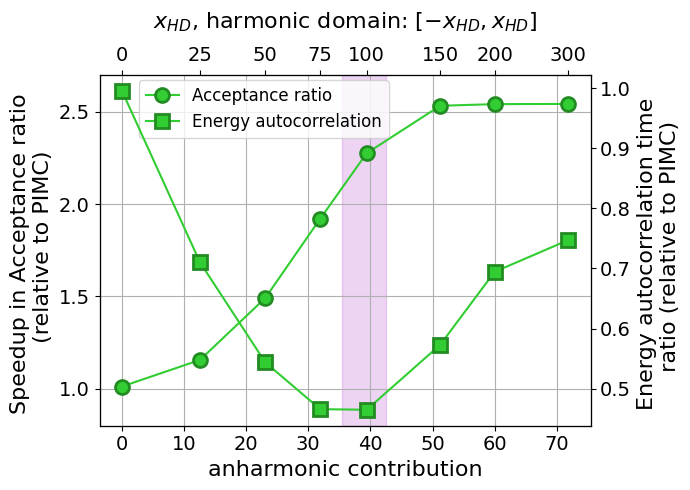

In [4]:
bhw = 16

df_ECorr = np.loadtxt('../data/Fig_5/SpeedupEnergyAutocorrelation.txt', delimiter=',', skiprows=1)
df_StgAcc = np.loadtxt('../data/Fig_5/SpeedupAcceptanceRatio.txt', delimiter=',', skiprows=1)

anhcontribution = list(np.copy(df_StgAcc[:,0]))
xhds = list(np.copy(df_StgAcc[:, 1]))

fig, ax1 = plt.subplots(figsize = (7, 5.))

# --- first y-axis (left)
ax1.plot(anhcontribution, df_StgAcc[:,2], linestyle='-', marker='o',
         markersize=10, color='limegreen', markerfacecolor='limegreen',
         markeredgecolor='forestgreen', markeredgewidth=2, label='Acceptance ratio')
ax1.set_xlabel('anharmonic contribution', fontsize=16)
ax1.set_ylabel('Speedup in Acceptance ratio \n (relative to PIMC)', fontsize=16)#, color='limegreen')  ### <-- CHANGED
# ax1.tick_params(axis='y', labelcolor='limegreen')                    ### <-- CHANGED

# --- second y-axis (right)
ax2 = ax1.twinx()                                                    ### <-- CHANGED
ax2.plot(anhcontribution, (df_ECorr[:,2]), linestyle='-',
         marker='s', markersize=10, color='limegreen',
         markerfacecolor='limegreen', markeredgecolor='forestgreen',
         markeredgewidth=2, label='Energy autocorrelation')     ### <-- CHANGED
ax2.set_ylabel('Energy autocorrelation time \n ratio (relative to PIMC)', fontsize=16)#, color='darkviolet')  ### <-- CHANGED
# ax2.tick_params(axis='y', labelcolor='darkviolet')                   ### <-- CHANGED

# --- keep your twin X-axis for x_HD labels
ax3 = ax1.twiny()
ax3.set_xlim(ax1.get_xlim())
ax3.set_xticks(anhcontribution)
ax3.set_xticklabels([f"{v:.0f}" for v in xhds])
ax3.set_xlabel("$x_{HD}$, harmonic domain: $[-x_{HD}, x_{HD}]$", fontsize=16, labelpad=13)
ax3.tick_params(labelsize=14)

# --- cosmetics and legend
ax1.grid(True)
ax1.tick_params(axis='both', which='major', labelsize=14)
ax2.tick_params(axis='both', which='major', labelsize=14)

# keep fill and other decorations
y1 = np.array([35.5, 42.5])
y2 = np.array([3, 3])
ax1.fill_between(y1, y2, color='mediumorchid', alpha=0.25)

# combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()                    ### <-- CHANGED
ax1.legend(lines + lines2, labels + labels2, loc=[0.08, 0.82], frameon=True, fontsize=12)  ### <-- CHANGED

ax1.set_ylim(0.8, 2.7)
ax1.set_yticks([1, 1.5, 2, 2.5])
plt.tight_layout()
plt.savefig('../figures/anhpot_mpimc6.svg')